# Fake News Detection using NLP

In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

plt.style.use('Solarize_Light2')
%matplotlib inline

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('../input/traindata/train.csv') # loading data

In [3]:
df.head() # looking at first five rows of the data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape # shape of data

(20800, 5)

In [5]:
df.isnull().sum() # checking for null values in data

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# dropping missing values

df.dropna(inplace = True)

In [7]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df.shape

(18285, 5)

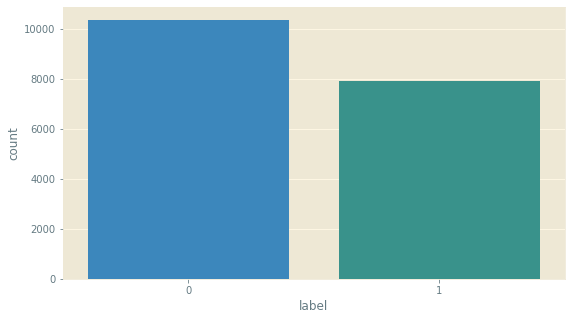

In [9]:
# checking distribution of data to see if there is any imbalancing present in the data.

plt.figure(figsize = (9, 5))
sns.countplot(df['label'])

plt.show()

In [10]:
df.dtypes # looking at data types of data

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [11]:
df['label'] = df['label'].astype(str)

In [12]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

In [13]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
df.reset_index(inplace = True) # resetting the index of data 

In [15]:
df.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [16]:
df.drop(['index','id'],axis=1,inplace=True) # dropping 'index' and 'id' columns

In [17]:
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [18]:
ps = PorterStemmer() # initializing porter stemmer

In [19]:
corpus=[]
sentences=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ', df['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [20]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [21]:
corpus[:20]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000, ngram_range = (1, 3))

In [23]:
# splitting dataset into features and label 

X = cv.fit_transform(corpus).toarray()
y = df['label']

In [24]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 0        1
 1        0
 2        1
 3        1
 4        1
         ..
 18280    0
 18281    0
 18282    0
 18283    1
 18284    1
 Name: label, Length: 18285, dtype: object)

In [25]:
X.shape, y.shape

((18285, 5000), (18285,))

In [26]:
cv.get_feature_names()[0:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [27]:
# splitting dataset into train data and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [30]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9015748031496063

In [31]:
# confusion matrix function

def plot_confusion_matrix(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

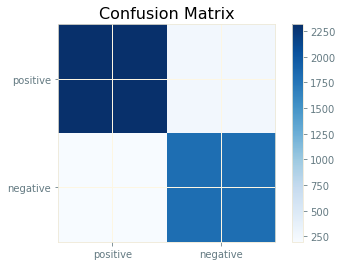

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

## Passive Aggressive Classifier Algorithm

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [34]:
y_pred = linear_clf.predict(X_test)

In [35]:
metrics.accuracy_score(y_test,y_pred)

0.9138232720909887

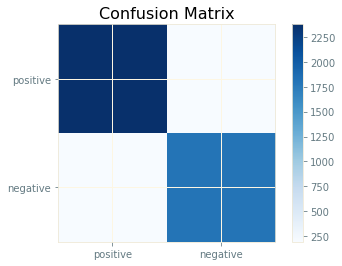

In [36]:
cm2 = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm2)

In [37]:
### Most 20 real values

feature_names = cv.get_feature_names()
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]

[(-3.9914839716490507, 'trump'),
 (-4.279898913316484, 'hillari'),
 (-4.348158915587783, 'clinton'),
 (-4.88335015151613, 'elect'),
 (-5.184527705442797, 'new'),
 (-5.23658406739885, 'comment'),
 (-5.3201316376692915, 'video'),
 (-5.349607455802245, 'us'),
 (-5.388828168955526, 'hillari clinton'),
 (-5.406765869642194, 'war'),
 (-5.429650163475781, 'fbi'),
 (-5.45307043768388, 'email'),
 (-5.4722097778945775, 'vote'),
 (-5.579181897446745, 'world'),
 (-5.579181897446745, 'obama'),
 (-5.755072563910409, 'russia'),
 (-5.828194828739372, 'donald'),
 (-5.835115271583946, 'day'),
 (-5.835115271583946, 'america'),
 (-5.870454638029255, 'say')]

In [38]:
### Most 20 fake values

feature_names = cv.get_feature_names()
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[-20:]

[(-10.804928571159946, 'american new'),
 (-10.804928571159946, 'american breitbart'),
 (-10.804928571159946, 'america new york'),
 (-10.804928571159946, 'america new'),
 (-10.804928571159946, 'america breitbart'),
 (-10.804928571159946, 'amazon'),
 (-10.804928571159946, 'ali'),
 (-10.804928571159946, 'aleppo new york'),
 (-10.804928571159946, 'aleppo new'),
 (-10.804928571159946, 'agenda breitbart'),
 (-10.804928571159946, 'age new york'),
 (-10.804928571159946, 'age new'),
 (-10.804928571159946, 'advis new york'),
 (-10.804928571159946, 'advis new'),
 (-10.804928571159946, 'advic'),
 (-10.804928571159946, 'act new york'),
 (-10.804928571159946, 'act new'),
 (-10.804928571159946, 'abus new york'),
 (-10.804928571159946, 'abus new'),
 (-10.804928571159946, 'abroad')]

### Thanks for reading, Please do Upvote !!